In [14]:
# Bước 1: Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kiểu hiển thị mặc định cho seaborn và matplotlib
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Bước 2: Đọc dữ liệu từ file CSV (giả sử bạn có file data.csv)
df = pd.read_csv("../data/processed/processed_data_1.csv")

# Hiển thị 5 dòng đầu tiên
df.head()

,day,month,year,day_of_week,is_holiday,weather_condition,temperature,voucher_active,number_of_guests
0,2,2,2024,Friday,0,Clouds,36.6,0,26
1,3,2,2024,Saturday,0,Clouds,33.5,1,41
2,4,2,2024,Sunday,0,Rain,28.0,0,16
3,5,2,2024,Monday,0,Drizzle,26.5,0,26
4,6,2,2024,Tuesday,0,Drizzle,28.1,0,20


In [15]:
# Bước 3: Kiểm tra thông tin tổng quan dữ liệu
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                484 non-null    int64  
 1   month              484 non-null    int64  
 2   year               484 non-null    int64  
 3   day_of_week        484 non-null    object 
 4   is_holiday         484 non-null    int64  
 5   weather_condition  484 non-null    object 
 6   temperature        484 non-null    float64
 7   voucher_active     484 non-null    int64  
 8   number_of_guests   484 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 34.2+ KB


,day,month,year,is_holiday,temperature,voucher_active,number_of_guests
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,15.698347,5.787190,2024.309917,0.068182,28.326240,0.491736,23.741736
std,8.758310,3.311027,0.462938,0.252318,5.677254,0.500449,8.318544
min,1.000000,1.000000,2024.000000,0.000000,12.200000,0.000000,2.000000
25%,8.000000,3.000000,2024.000000,0.000000,24.100000,0.000000,18.000000
50%,16.000000,5.000000,2024.000000,0.000000,28.050000,0.000000,23.000000
75%,23.000000,9.000000,2025.000000,0.000000,32.700000,1.000000,30.000000
max,31.000000,12.000000,2025.000000,1.000000,42.000000,1.000000,48.000000


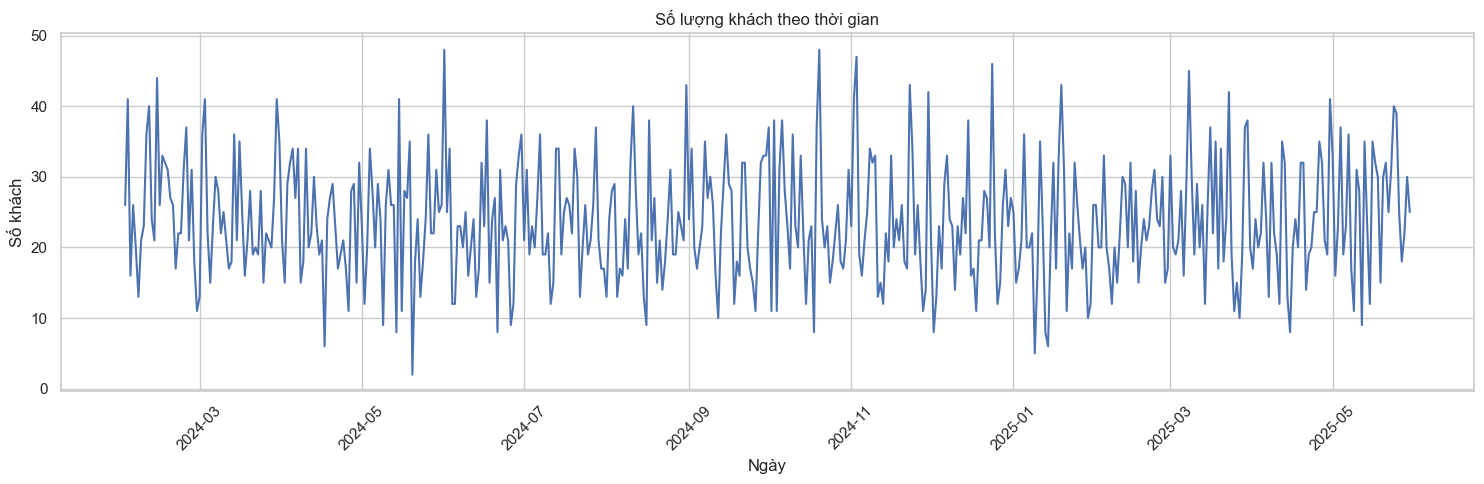

In [16]:
# Bước 4: Chuyển đổi cột ngày tháng thành định dạng datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.set_index('date', inplace=True)

# Bước 5: Biểu đồ số lượng khách theo thời gian
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='date', y='number_of_guests')
plt.title("Số lượng khách theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Số khách")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

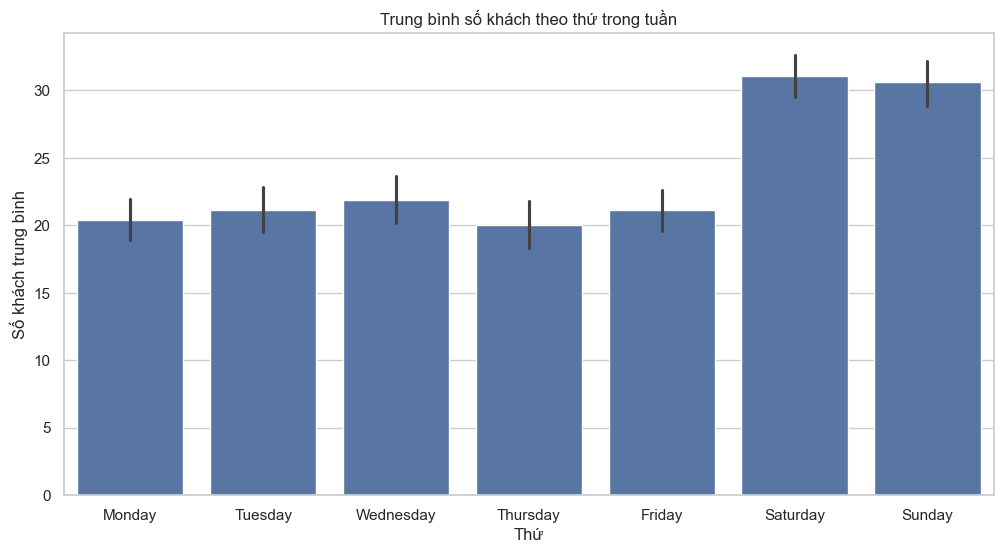

In [17]:
# Bước 6: Trung bình số khách theo thứ trong tuần
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

sns.barplot(data=df, x='day_of_week', y='number_of_guests')
plt.title("Trung bình số khách theo thứ trong tuần")
plt.xlabel("Thứ")
plt.ylabel("Số khách trung bình")
plt.show()

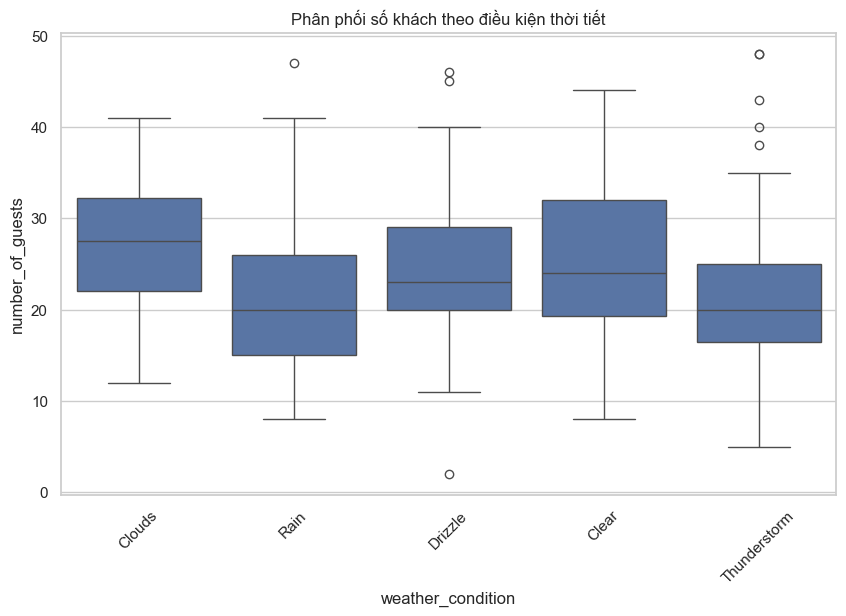

In [18]:
# Bước 7: Số khách theo điều kiện thời tiết
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='weather_condition', y='number_of_guests')
plt.title("Phân phối số khách theo điều kiện thời tiết")
plt.xticks(rotation=45)
plt.show()

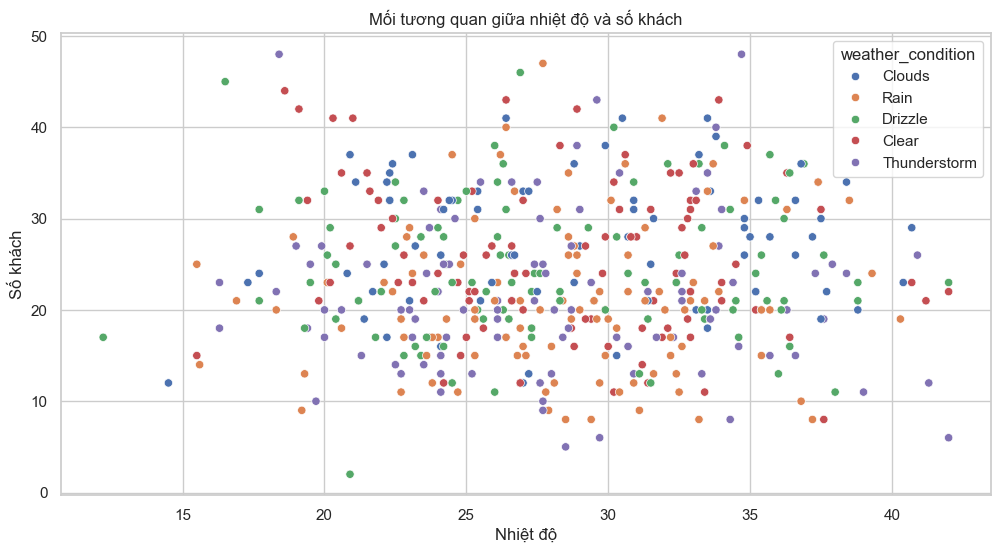

In [19]:
# Bước 8: Mối tương quan giữa nhiệt độ và số khách
sns.scatterplot(data=df, x='temperature', y='number_of_guests', hue='weather_condition')
plt.title("Mối tương quan giữa nhiệt độ và số khách")
plt.xlabel("Nhiệt độ")
plt.ylabel("Số khách")
plt.show()

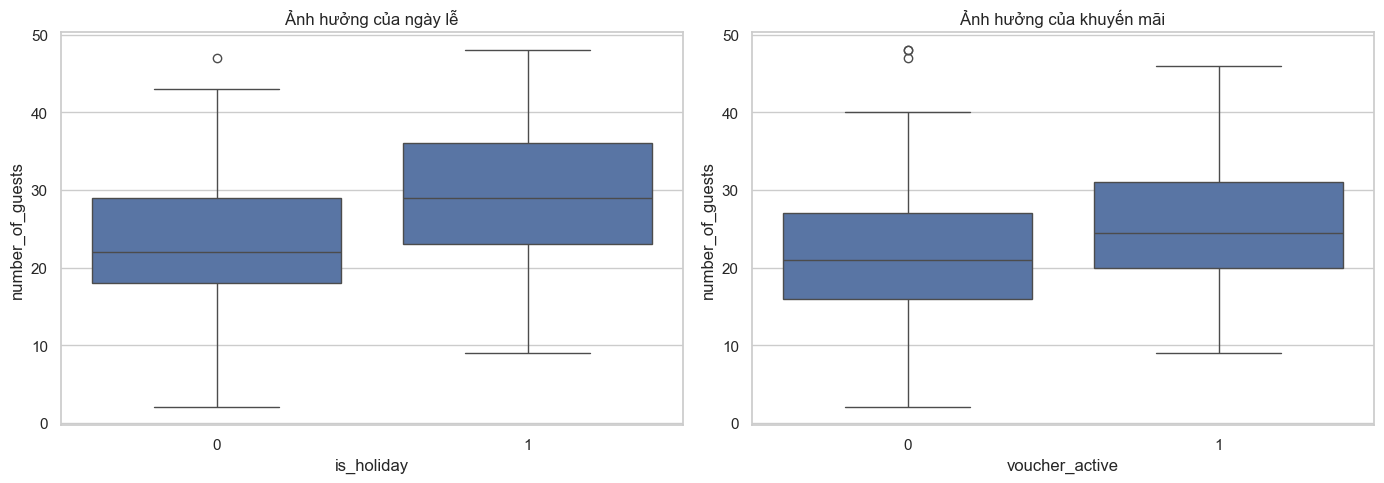

In [20]:
# Bước 9: Ảnh hưởng của ngày lễ và voucher
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=df, x='is_holiday', y='number_of_guests', ax=axes[0])
axes[0].set_title("Ảnh hưởng của ngày lễ")

sns.boxplot(data=df, x='voucher_active', y='number_of_guests', ax=axes[1])
axes[1].set_title("Ảnh hưởng của khuyến mãi")

plt.tight_layout()
plt.show()

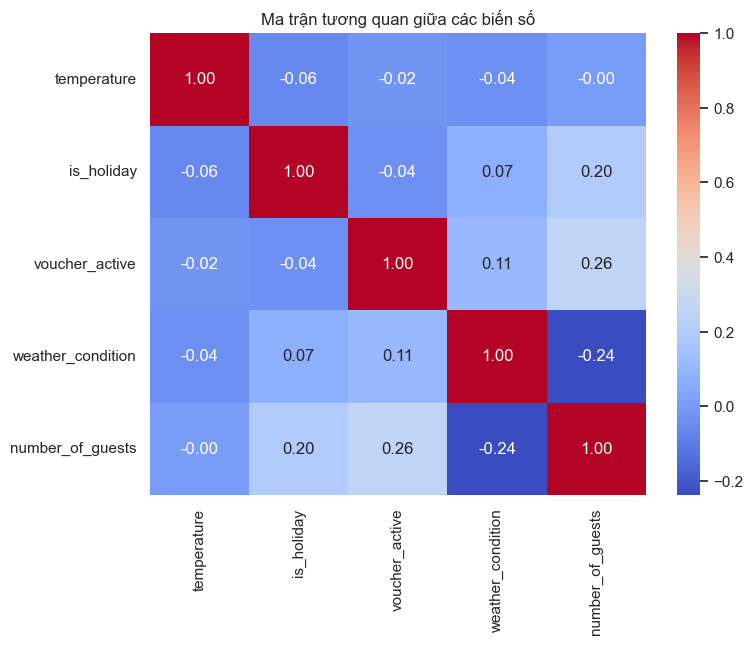

In [21]:
# Bước 10: Heatmap mối tương quan giữa các biến số
import numpy as np

# Chuyển các biến phân loại sang dạng số (nếu cần)
df_encoded = df.copy()

# Ánh xạ các cột phân loại thành số
df_encoded['is_holiday'] = df_encoded['is_holiday'].astype(int)
df_encoded['voucher_active'] = df_encoded['voucher_active'].astype(int)

# Nếu weather_condition là dạng text, mã hóa đơn giản
df_encoded['weather_condition'] = df_encoded['weather_condition'].astype('category').cat.codes

# Chọn các cột số để vẽ heatmap
numeric_cols = ['temperature', 'is_holiday', 'voucher_active', 'weather_condition', 'number_of_guests']
corr = df_encoded[numeric_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến số")
plt.show()